In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, hinge_loss
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

In [56]:
df = pd.read_csv('./data_banknote_authentication.txt', header=None, names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [57]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
# Logistic loss
clf_logistic = SGDClassifier(loss="log")
clf_logistic.fit(X_train, y_train)

# Adaboost loss
clf_adaboost = SGDClassifier(loss="hinge")
clf_adaboost.fit(X_train, y_train)
clear_output(wait=True)


In [59]:
def plot_learning_curve(clf, loss, X_train, y_train, X_test, y_test, epochs=50):
    train_errors, test_errors = [], []
    for epoch in range(epochs):
        clf.partial_fit(X_train, y_train, classes=[0, 1])
        
        if "log" in loss:
            train_errors.append(log_loss(y_train, clf.predict_proba(X_train)))
            test_errors.append(log_loss(y_test, clf.predict_proba(X_test)))
        else:  # assuming "hinge"
            train_errors.append(hinge_loss(y_train, clf.decision_function(X_train)))
            test_errors.append(hinge_loss(y_test, clf.decision_function(X_test)))
            
    plt.plot(train_errors, label=f"Train {loss}")
    plt.plot(test_errors, label=f"Test {loss}")
    plt.legend()
    plt.title(f"Learning Curves: {loss}")
    plt.xlabel("Epochs")
    plt.ylabel("Log Loss")


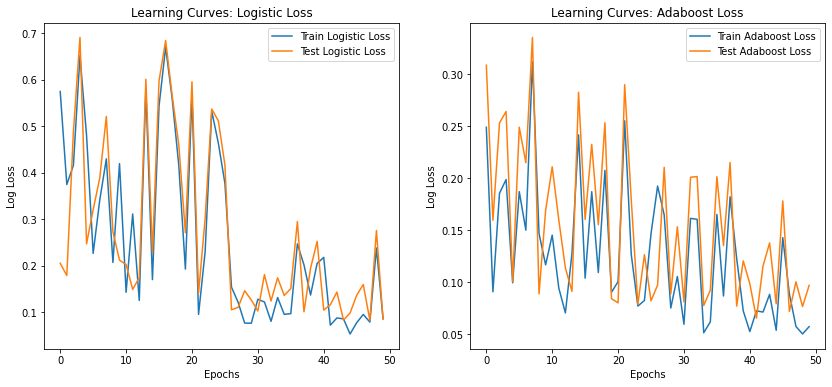

In [60]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_learning_curve(clf_logistic, "Logistic Loss", X_train, y_train, X_test, y_test)

plt.subplot(1, 2, 2)
plot_learning_curve(clf_adaboost, "Adaboost Loss", X_train, y_train, X_test, y_test)

plt.show()

In [61]:
print('Logistic loss accuracy:', clf_logistic.score(X_test, y_test))
print('Adaboost loss accuracy:', clf_adaboost.score(X_test, y_test))

Logistic loss accuracy: 0.9889624724061811
Adaboost loss accuracy: 0.9889624724061811
